# 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import re
import sys 
import statsmodels.stats.multitest

import cptac
import cptac.utils as u

/Users/Lindsey/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [72]:
df = pd.read_csv("Step3.2_combining_pearson_dfs/csv_files/pancan_EGFR_prot_interacting_wide.csv")
df = df.drop(['Unnamed: 0'], axis=1)
df= df.dropna(thresh = 8)
df["Standard_Deviation_Correlation"] = (df.loc[:,["Correlation_Gbm","Correlation_kidney","Correlation_Ovar","Correlation_Brca","Correlation_Luad","Correlation_hnscc","Correlation_colon","Correlation_Lscc"]].std(axis = 1))
df["Mean_Correlation"] = (df.loc[:,["Correlation_Gbm","Correlation_kidney","Correlation_Ovar","Correlation_Brca","Correlation_Luad","Correlation_hnscc","Correlation_colon","Correlation_Lscc"]].mean(axis = 1))
df["Standard_Deviation_P_value"] = df.loc[:,["P_value_Gbm","P_value_kidney","P_value_Ovar","P_value_Brca","P_value_Luad","P_value_hnscc","P_value_colon","P_value_Lscc"]].std(axis = 1)
df["Mean_P_value"] = df.loc[:,["P_value_Gbm","P_value_kidney","P_value_Ovar","P_value_Brca","P_value_Luad","P_value_hnscc","P_value_colon","P_value_Lscc"]].mean(axis = 1)
df = df.set_index('Comparison')

df

,Correlation_Gbm,P_value_Gbm,Correlation_kidney,P_value_kidney,Correlation_Ovar,P_value_Ovar,Correlation_Brca,P_value_Brca,Correlation_Luad,P_value_Luad,Correlation_hnscc,P_value_hnscc,Correlation_colon,P_value_colon,Correlation_Lscc,P_value_Lscc,Standard_Deviation_Correlation,Mean_Correlation,Standard_Deviation_P_value,Mean_P_value
Comparison,,,,,,,,,,,,,,,,,,,,
EGFR_proteomics,1.000000,0.000000e+00,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000e+00,1.000000,0.000000,1.000000,0.000000,1.186878e-16,1.000000,0.000000,0.000000
GRB2_proteomics,-0.610889,1.886384e-11,-0.217427,0.022506,-0.190090,0.085202,-0.177379,0.057899,-0.302439,0.001321,-0.532341,2.559824e-09,0.150960,0.139949,-0.174810,0.067764,2.356400e-01,-0.256802,0.050360,0.046830
SHC1_proteomics,-0.540524,7.695118e-09,NaN,NaN,0.175098,0.113358,0.090908,0.333927,-0.135844,0.262164,NaN,NaN,0.203250,0.045855,0.123922,0.197109,2.846252e-01,-0.013865,0.128732,0.158735
WAS_proteomics,-0.501918,1.205168e-07,-0.279814,0.003071,-0.090413,0.416288,0.153496,0.101463,-0.337909,0.000306,-0.503427,2.411333e-08,0.282401,0.005070,-0.177954,0.062892,2.868968e-01,-0.181942,0.143529,0.073636
NPC2_proteomics,-0.498791,1.484249e-07,-0.319133,0.000678,-0.183193,0.097375,0.279599,0.002476,0.292520,0.001928,NaN,NaN,0.040840,0.691234,-0.013310,0.890238,2.962998e-01,-0.057352,0.381823,0.240561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MYLK2_proteomics,NaN,NaN,NaN,NaN,0.055288,0.637550,0.142506,0.128693,-0.160980,0.094479,NaN,NaN,NaN,NaN,-0.015909,0.868972,1.283525e-01,0.005226,0.382584,0.432424
COL6A5_proteomics,NaN,NaN,NaN,NaN,0.028812,0.795971,0.231412,0.070341,-0.041093,0.669934,NaN,NaN,NaN,NaN,0.051457,0.593426,1.160653e-01,0.067647,0.319170,0.532418
WNT11_proteomics,NaN,NaN,NaN,NaN,0.004664,0.966618,NaN,NaN,-0.150357,0.302444,NaN,NaN,-0.253386,0.148195,-0.168509,0.163180,1.075326e-01,-0.141897,0.387284,0.395109


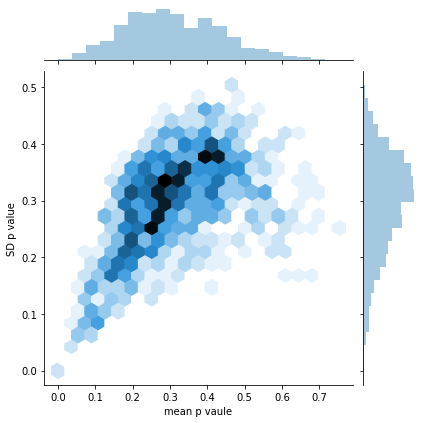

In [73]:
g = (sns.jointplot("Mean_P_value","Standard_Deviation_P_value",data = df, kind="hex", bins = 50)
        .set_axis_labels("mean p vaule", "SD p value"))

plt.show()
g.savefig("Step3C_Pval_EGFR.png")

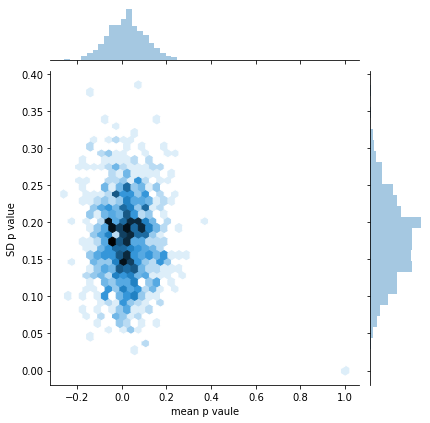

In [74]:
g = (sns.jointplot("Mean_Correlation","Standard_Deviation_Correlation",data = df, kind="hex", bins = 50)
        .set_axis_labels("mean p vaule", "SD p value"))

plt.show()
g.savefig("Step3C_Pval_coor.png")


In [75]:
df = pd.read_csv("Step3.2_combining_pearson_dfs/csv_files/pancan_EGFR_all_return_all_wide.csv")
df = df.drop(['Unnamed: 0'], axis=1)
df= df.dropna(thresh = 8)
df["Standard_Deviation_Correlation"] = (df.loc[:,["Correlation_Gbm","Correlation_kidney","Correlation_Ovar","Correlation_Brca","Correlation_Luad","Correlation_hnscc","Correlation_colon","Correlation_Lscc"]].std(axis = 1))
df["Mean_Correlation"] = (df.loc[:,["Correlation_Gbm","Correlation_kidney","Correlation_Ovar","Correlation_Brca","Correlation_Luad","Correlation_hnscc","Correlation_colon","Correlation_Lscc"]].mean(axis = 1))
df["Standard_Deviation_P_value"] = df.loc[:,["P_value_Gbm","P_value_kidney","P_value_Ovar","P_value_Brca","P_value_Luad","P_value_hnscc","P_value_colon","P_value_Lscc"]].std(axis = 1)
df["Mean_P_value"] = df.loc[:,["P_value_Gbm","P_value_kidney","P_value_Ovar","P_value_Brca","P_value_Luad","P_value_hnscc","P_value_colon","P_value_Lscc"]].mean(axis = 1)
df = df.set_index('Comparison')

df

,Correlation_Gbm,P_value_Gbm,Correlation_kidney,P_value_kidney,Correlation_Ovar,P_value_Ovar,Correlation_Brca,P_value_Brca,Correlation_Luad,P_value_Luad,Correlation_hnscc,P_value_hnscc,Correlation_colon,P_value_colon,Correlation_Lscc,P_value_Lscc,Standard_Deviation_Correlation,Mean_Correlation,Standard_Deviation_P_value,Mean_P_value
Comparison,,,,,,,,,,,,,,,,,,,,
PHLDA1_proteomics,0.816848,6.553435e-25,0.254436,0.007311,NaN,NaN,0.364797,0.000190,0.260110,0.011346,0.664271,3.426615e-15,0.386104,0.021968,0.713420,4.569893e-18,0.231588,0.494284,0.008434,0.005831
GRB2_proteomics,-0.610889,1.886384e-11,-0.217427,0.022506,-0.190090,0.085202,-0.177379,0.057899,-0.302439,0.001321,-0.532341,2.559824e-09,0.150960,0.139949,-0.198042,3.992126e-02,0.234626,-0.259706,0.049664,0.043350
PLA2G15_proteomics,-0.556624,2.197562e-09,-0.298029,0.001566,-0.035395,0.759903,0.274185,0.003025,-0.182930,0.055768,-0.089313,3.557176e-01,NaN,NaN,-0.147438,1.278266e-01,0.253333,-0.147935,0.283021,0.186258
DAB2_proteomics,-0.556402,2.237010e-09,-0.076173,0.428981,0.076981,0.489114,0.326055,0.000376,-0.086403,0.369438,-0.208437,2.962992e-02,-0.147519,0.149313,-0.072496,4.559000e-01,0.249653,-0.093049,0.216675,0.240344
GLA_proteomics,-0.550491,3.570229e-09,-0.298348,0.001547,0.022300,0.841394,0.069504,0.460453,0.163722,0.087439,-0.019486,8.406062e-01,0.057118,0.578410,-0.033880,7.277701e-01,0.234681,-0.073695,0.365297,0.442202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MMP28_proteomics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.102472,0.286757,0.205404,4.355525e-02,0.024113,0.892325,0.146335,1.307357e-01,0.136629,0.068345,0.382779,0.338343
GSDMB_proteomics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.099250,0.302258,-0.174151,9.501358e-02,0.135307,0.186358,0.070832,5.095032e-01,0.140474,0.032810,0.178863,0.273283
SCARA5_proteomics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.114889,0.323027,-0.158581,1.600284e-01,0.084849,0.570676,-0.030368,7.775538e-01,0.107207,-0.054747,0.271916,0.457821


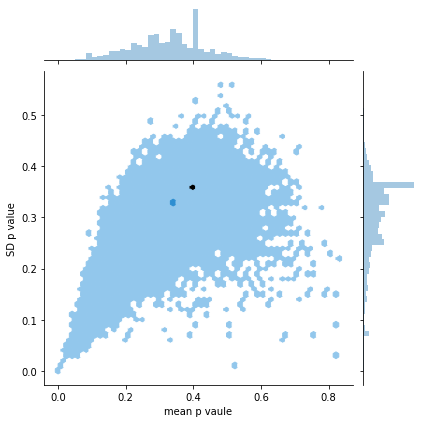

In [80]:
g = (sns.jointplot("Mean_P_value","Standard_Deviation_P_value",data = df, kind="hex", bins = 5)
        .set_axis_labels("mean p vaule", "SD p value"))

plt.show()
#g.savefig("Step3C_Pval_EGFR.png")

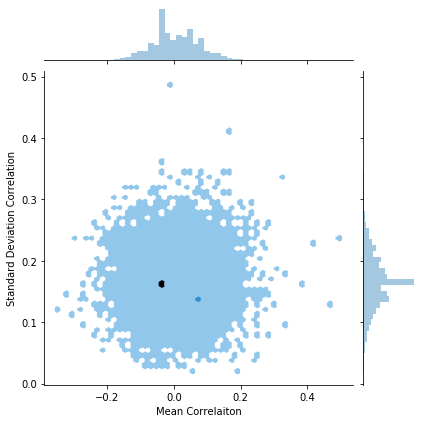

In [82]:
g = (sns.jointplot("Mean_Correlation","Standard_Deviation_Correlation",data = df, kind="hex", bins = 5)
        .set_axis_labels("Mean Correlaiton", "Standard Deviation Correlation"))

plt.show()

In [83]:
df = pd.read_csv("Step3.2_combining_pearson_dfs/csv_files/pancan_EGFR_all_return_all_wide.csv")
df = df.drop(['Unnamed: 0'], axis=1)
df= df.dropna(thresh = 16)
df["Standard_Deviation_Correlation"] = (df.loc[:,["Correlation_Gbm","Correlation_kidney","Correlation_Ovar","Correlation_Brca","Correlation_Luad","Correlation_hnscc","Correlation_colon","Correlation_Lscc"]].std(axis = 1))
df["Mean_Correlation"] = (df.loc[:,["Correlation_Gbm","Correlation_kidney","Correlation_Ovar","Correlation_Brca","Correlation_Luad","Correlation_hnscc","Correlation_colon","Correlation_Lscc"]].mean(axis = 1))
df["Standard_Deviation_P_value"] = df.loc[:,["P_value_Gbm","P_value_kidney","P_value_Ovar","P_value_Brca","P_value_Luad","P_value_hnscc","P_value_colon","P_value_Lscc"]].std(axis = 1)
df["Mean_P_value"] = df.loc[:,["P_value_Gbm","P_value_kidney","P_value_Ovar","P_value_Brca","P_value_Luad","P_value_hnscc","P_value_colon","P_value_Lscc"]].mean(axis = 1)
df = df.set_index('Comparison')


In [84]:
df

,Correlation_Gbm,P_value_Gbm,Correlation_kidney,P_value_kidney,Correlation_Ovar,P_value_Ovar,Correlation_Brca,P_value_Brca,Correlation_Luad,P_value_Luad,Correlation_hnscc,P_value_hnscc,Correlation_colon,P_value_colon,Correlation_Lscc,P_value_Lscc,Standard_Deviation_Correlation,Mean_Correlation,Standard_Deviation_P_value,Mean_P_value
Comparison,,,,,,,,,,,,,,,,,,,,
GRB2_proteomics,-0.610889,1.886384e-11,-0.217427,0.022506,-0.190090,0.085202,-0.177379,0.057899,-0.302439,0.001321,-0.532341,2.559824e-09,0.150960,0.139949,-0.198042,0.039921,0.234626,-0.259706,0.049664,0.043350
DAB2_proteomics,-0.556402,2.237010e-09,-0.076173,0.428981,0.076981,0.489114,0.326055,0.000376,-0.086403,0.369438,-0.208437,2.962992e-02,-0.147519,0.149313,-0.072496,0.455900,0.249653,-0.093049,0.216675,0.240344
GLA_proteomics,-0.550491,3.570229e-09,-0.298348,0.001547,0.022300,0.841394,0.069504,0.460453,0.163722,0.087439,-0.019486,8.406062e-01,0.057118,0.578410,-0.033880,0.727770,0.234681,-0.073695,0.365297,0.442202
CTSC_proteomics,-0.546285,4.951742e-09,-0.302316,0.001328,-0.072453,0.515094,0.266940,0.003928,0.302760,0.001305,-0.052297,5.891481e-01,0.193621,0.057401,-0.037491,0.700078,0.290803,-0.030940,0.309269,0.233535
CKB_proteomics,0.544246,5.793441e-09,0.047777,0.620141,-0.003626,0.974047,0.015466,0.869690,0.006996,0.942173,-0.100408,2.988849e-01,0.133265,0.193152,-0.076291,0.432594,0.204312,0.070928,0.367777,0.541335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRAPPC6B_proteomics,0.000086,9.993259e-01,-0.403990,0.000012,0.097295,0.381554,-0.054366,0.563894,-0.102539,0.286441,-0.050771,6.000761e-01,0.272763,0.006871,0.067976,0.484543,0.194193,-0.021693,0.329312,0.415340
ZNF598_proteomics,0.000083,9.993477e-01,-0.123255,0.199548,-0.067935,0.541703,0.135373,0.149161,0.158463,0.098238,0.184173,5.522612e-02,-0.065081,0.537659,0.050979,0.600300,0.116310,0.034100,0.327622,0.397648
PSMB4_proteomics,-0.000033,9.997438e-01,-0.003991,0.966992,0.051418,0.644339,0.138317,0.140434,-0.153210,0.110048,0.074806,4.394791e-01,0.103869,0.311313,-0.049696,0.609520,0.093243,0.020185,0.341241,0.527734


In [86]:
df = pd.read_csv("Step3.2_combining_pearson_dfs/csv_files/pancan_EGFR_all_FDR_wide.csv")
df = df.drop(['Unnamed: 0'], axis=1)
#df= df.dropna(thresh = 16)
df["Standard_Deviation_Correlation"] = (df.loc[:,["Correlation_Gbm","Correlation_kidney","Correlation_Ovar","Correlation_Brca","Correlation_Luad","Correlation_hnscc","Correlation_colon","Correlation_Lscc"]].std(axis = 1))
df["Mean_Correlation"] = (df.loc[:,["Correlation_Gbm","Correlation_kidney","Correlation_Ovar","Correlation_Brca","Correlation_Luad","Correlation_hnscc","Correlation_colon","Correlation_Lscc"]].mean(axis = 1))
df["Standard_Deviation_P_value"] = df.loc[:,["P_value_Gbm","P_value_kidney","P_value_Ovar","P_value_Brca","P_value_Luad","P_value_hnscc","P_value_colon","P_value_Lscc"]].std(axis = 1)
df["Mean_P_value"] = df.loc[:,["P_value_Gbm","P_value_kidney","P_value_Ovar","P_value_Brca","P_value_Luad","P_value_hnscc","P_value_colon","P_value_Lscc"]].mean(axis = 1)
df = df.set_index('Comparison')
df[1:]

,Correlation_Gbm,P_value_Gbm,Correlation_kidney,P_value_kidney,Correlation_Ovar,P_value_Ovar,Correlation_Brca,P_value_Brca,Correlation_Luad,P_value_Luad,Correlation_hnscc,P_value_hnscc,Correlation_colon,P_value_colon,Correlation_Lscc,P_value_Lscc,Standard_Deviation_Correlation,Mean_Correlation,Standard_Deviation_P_value,Mean_P_value
Comparison,,,,,,,,,,,,,,,,,,,,
PHLDA1_proteomics,0.816848,6.553435e-25,NaN,NaN,NaN,NaN,0.364797,0.000190,NaN,NaN,0.664271,3.426615e-15,NaN,NaN,0.709812,3.919195e-18,0.193623,0.638932,0.000095,4.757422e-05
GRB2_proteomics,-0.610889,1.886384e-11,NaN,NaN,NaN,NaN,NaN,NaN,-0.302439,0.001321,-0.532341,2.559824e-09,NaN,NaN,NaN,NaN,0.160295,-0.481890,0.000763,4.404226e-04
SOCS2_proteomics,0.562720,1.343464e-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.478574,2.191662e-04,0.059500,0.520647,0.000155,1.095838e-04
CDH4_proteomics,0.559180,1.790048e-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.559180,NaN,1.790048e-09
PLA2G15_proteomics,-0.556624,2.197562e-09,-0.298029,0.001566,NaN,NaN,0.274185,0.003025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.425156,-0.193490,0.001513,1.530062e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SLIT3_proteomics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.291391,2.011415e-03,NaN,-0.291391,NaN,2.011415e-03
AAK1_proteomics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.290954,2.044509e-03,NaN,0.290954,NaN,2.044509e-03
COMMD3-BMI1_proteomics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.290800,2.056267e-03,NaN,-0.290800,NaN,2.056267e-03
